<a href="https://colab.research.google.com/github/taerri/meal-kit-analysis/blob/main/TFIDF_LDA_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 읽기

In [1]:
import pandas as pd

In [2]:
Corpus_all = pd.read_csv("단어_빅카인즈(전처리 후(df)).csv", encoding="utf8")
print("데이터 개수 :",len(Corpus_all))
Corpus_all=Corpus_all.drop(['Unnamed: 0'],axis=1)
Corpus_all.head()

데이터 개수 : 5529


,키워드
0,"재배,채소,제공,웰빙,먹거리,하이원리조트,요리사,셰프들,재배,채소,식재료,활용,손님..."
1,"백화점,롯데쇼핑,매출,역성장,실적,롯데쇼핑,백화점,회복세,롯데마트,롯데하이마트,e커..."
2,"밀키트,창업,가정,안산시,밀키트,기탁,브랜드,100호,밀키트,창업,브랜드,최단,기간..."
3,"수산물,할인,정부,소비,촉진,정부,할인,쿠폰,발행,지원,추가,코로나19,최소화,전통..."
4,"소상공인,구독,경제,바우처,제공,소상공인,구독경제,중소벤처기업부,비상,경제,중앙,대..."


# 단어 빈도

In [3]:
Words_org = Corpus_all["키워드"]
#Words_2019 = Corpus_all[Corpus_all.Date < "2020/01/01"]["all_text"]
#Words_2020 = Corpus_all[Corpus_all.Date >= "2020/01/01"]["all_text"]
Words = [wl.split(",")  for wl in Words_org]

In [4]:
for wl in Words[:10]:
  print(wl)

['재배', '채소', '제공', '웰빙', '먹거리', '하이원리조트', '요리사', '셰프들', '재배', '채소', '식재료', '활용', '손님', '웰빙', '먹거리', '제공', '호평', '셰프들', '하이원리조트', '호텔', '셰프', '주인공', '호텔', '셰프', '키친', '오가닉팜', '운영', '고객', '건강', '먹거리', '새싹', '허브', '제공', '고객서비스', '에코', '캠페인', '키친가든', '식재료', '활용', '채소', '허브', '열매', '정원', '키친', '오가닉팜', '하이원리조트', '운암정', '조성', '호텔', '셰프', '구슬땀', '20여종', '채소', '허브', '재배', '재배', '채소', '허브', '호텔', '위치', '식음업장', '식재료', '활용', '하이원리조트', 'PB', '상품', 'GOURMET', '고메', '밀키트', '제품', '이용', '채소', '허브', '농법', '재배', '강원랜드', '사내', '벤처', '자원업사이클TF', '도움', '리조트', '배출', '음식물', '쓰레기', '동애등에', '곤충', '먹이', '활용', '자연', '분해', '퇴비', '지원', '활용', '하이원리조트', '조리', '이태규', '부장', '하이원리조트', '호텔', '손님', '정성', '재배', '식재료', '활용', '음식', '대접', '수요', '음식', '노력']
['백화점', '롯데쇼핑', '매출', '역성장', '실적', '롯데쇼핑', '백화점', '회복세', '롯데마트', '롯데하이마트', 'e커머스', '롯데온', '주력', '계열사', '부진', '매출', '역성장', '구조', '조정', '성과', '영업이익', '444%', '증가', '시장', '롯데쇼핑', '영업', '이익', '75억', '444.7%', '동기', '대비', '444.7%', '공시', '매출액', '3.5%', '감소', '영업이익', '송도롯데몰', '공사

In [5]:
def Word_count(corpus):
    word_cnt = dict()
    for text in corpus:
        for word in text:
            if word_cnt.get(word):
                word_cnt[word]+=1
            else:
                word_cnt[word]=1
    temp_word = pd.DataFrame.from_dict(word_cnt,orient='index')
    temp_word.columns = ["개수"]
    temp_word = temp_word.sort_values(["개수"],ascending=False)
    return temp_word

In [6]:
Words_cnt = Word_count(Words)
#Words_2019_cnt = Word_count(Words_2019)
#Words_2020_cnt = Word_count(Words_2020)

In [7]:
# 저장
Words_cnt.to_csv("단어빈도.csv")
#Words_2019_cnt.to_csv("./단어빈도/단어빈도_2019.csv",encoding="cp949")
#Words_2020_cnt.to_csv("./단어빈도/단어빈도_2020.csv",encoding="cp949")

- 각 문서 단어빈도 => 각 문서 단어빈도 차이가 심하기 때문에 워드 임베딩 해야함

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

count    5529.000000
mean      722.797613
std       428.895850
min        21.000000
25%       458.000000
50%       633.000000
75%       885.000000
max      5430.000000
dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0,

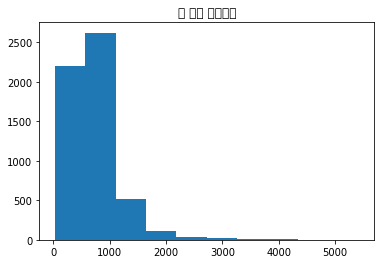

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

tf_of_doc = [len(x) for x in Corpus_all["키워드"]]
print(pd.Series(tf_of_doc).describe())
plt.hist(tf_of_doc)
plt.title("각 문서 단어빈도")
plt.show()

In [9]:
temp = list(Corpus_all["키워드"])
sum([1 if len(x)>700 else 0 for x in temp])

2287

In [10]:
temp = list(Corpus_all["키워드"])
temp = [x[:700] if len(x)>700 else x for x in temp]
Corpus_all["키워드"] = temp

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_

count    5529.000000
mean      567.413095
std       156.763463
min        21.000000
25%       458.000000
50%       633.000000
75%       700.000000
max       700.000000
dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0,

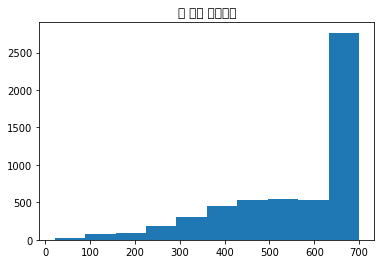

In [11]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

tf_of_doc = [len(x) for x in Corpus_all["키워드"]]
print(pd.Series(tf_of_doc).describe())
plt.hist(tf_of_doc)
plt.title("각 문서 단어빈도")
plt.show()

---
# TF-IDF
사이킷런은 TF-IDF를 자동 계산해주는 TfidfVectorizer를 제공

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
def TF_IDF(data,Words_cnt,path_savefile):
    tf_idf = [" ".join(x) for x in list(data)]
    tfidfv = TfidfVectorizer().fit(tf_idf)
    tf_idf = tfidfv.transform(tf_idf).toarray()
    #print(tf_idf)
    return tf_idf
    """
    colnames = pd.DataFrame(tfidfv.vocabulary_.keys())
    colnames.index = list(tfidfv.vocabulary_.values())
    colnames = colnames.sort_index()
    colnames["tf_idf"] = tf_idf.sum(axis=0)
    colnames.columns = ["단어","tf-idf"]
    colnames["개수"] = [Words_cnt.loc[x][0] for x in colnames["단어"]]
    sum_cnt = sum(colnames["개수"])
    colnames["퍼센트"] = ["{:.2f}".format(x/sum_cnt*100) for x in colnames["개수"]]
    colnames.to_csv(path_savefile,index=False)
    """

In [14]:
tf_idf = TF_IDF(Words,Words_cnt,"tf_idf.csv")
#TF_IDF(Words_2019,Words_2019_cnt,"./tf_idf/tf_idf_2019.csv")
#TF_IDF(Words_2020,Words_2020_cnt,"./tf_idf/tf_idf_2020.csv")

In [15]:
print(type(tf_idf))
print(tf_idf.shape)

<class 'numpy.ndarray'>
(5529, 61293)


# LDA

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
import pickle
from gensim import corpora
import gensim


In [17]:
class LDA_model:
    def __init__(self,corpus):
        self.corpus = corpus
        return;
    def mk_detokenized_doc(self):
        self.detokenized_doc = []
        for i in range(len(self.corpus)):
            try:
                t = ' '.join(self.corpus.iloc[i])
                self.detokenized_doc.append(t)
            except:
                print(i)
        return;
    def tf_idf_vector(self,max_features):
        self.vectorizer = TfidfVectorizer(max_features= max_features) # 상위 1000개의 단어 보존
        self.X = self.vectorizer.fit_transform(self.detokenized_doc)
        return;
    def mk_word2id(self):
        self.word2id = defaultdict(lambda : 0)
        for idx, feature in enumerate(self.vectorizer.get_feature_names()):
            self.word2id[feature] = idx
        return;
    def print_word2id(self,n=1):
        for i, sent in enumerate(self.detokenized_doc):
            print('====== document[%d] ======' % i)
            print( [ (token, self.X[i, self.word2id[token]]) for token in sent.split() ] )
            if i==n:
                break
        return;
    def mk_lda_model(self,n_topic=10,max_iter=1):
        self.lda_model=LatentDirichletAllocation(n_components=n_topic,learning_method='online',random_state=777,max_iter=max_iter)
        self.lda_top=self.lda_model.fit_transform(self.X)
        return;
    def print_lda(self):
        print("-------------------------------------")
        print(self.lda_model.components_)
        print(self.lda_model.components_.shape) 
        return;
    def print_topic_lda(self,n=5):
        print("-------------------------------------")
        terms = self.vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.
        for idx, topic in enumerate(self.lda_model.components_):
            print("Topic %d:" % (idx+1), [(terms[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
        return;

In [18]:
model_all = LDA_model(Words)

# LDA 시각화

- 토픽별 단어 분포

In [19]:
!pip install pyLDAvis

In [20]:
dictionary = corpora.Dictionary(model_all.corpus)
corpus = [dictionary.doc2bow(text) for text in model_all.corpus]
NUM_TOPICS = 6
num_words = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=num_words)
for topic in topics:
    print(topic)
dictionary.save('dictionary_전처리.gensim')
pickle.dump(corpus, open('corpus_전처리.pkl', 'wb'))
ldamodel.save('gensim_model_전처리.gensim')

(0, '0.012*"세트" + 0.011*"판매" + 0.010*"진행" + 0.009*"행사" + 0.009*"선물" + 0.008*"할인" + 0.008*"상품" + 0.008*"밀키트" + 0.006*"준비" + 0.006*"이벤트" + 0.006*"방송" + 0.005*"명절" + 0.005*"구성" + 0.005*"제공" + 0.004*"인기" + 0.004*"최대" + 0.004*"크리스마스" + 0.004*"산천어" + 0.004*"추석" + 0.004*"구매" + 0.004*"고객" + 0.004*"홈파티" + 0.004*"캠핑" + 0.004*"브랜드" + 0.004*"연말" + 0.003*"프로그램" + 0.003*"요리" + 0.003*"온라인" + 0.003*"참여" + 0.003*"라이브"')
(1, '0.017*"상품" + 0.016*"매출" + 0.012*"증가" + 0.011*"배송" + 0.010*"판매" + 0.009*"코로나19" + 0.009*"온라인" + 0.009*"대비" + 0.007*"밀키트" + 0.007*"주문" + 0.007*"이마트" + 0.006*"구매" + 0.006*"식품" + 0.005*"기간" + 0.005*"수요" + 0.005*"매장" + 0.005*"가격" + 0.005*"고객" + 0.005*"서비스" + 0.004*"소비" + 0.004*"인기" + 0.004*"할인" + 0.004*"새벽" + 0.004*"SSG닷컴" + 0.004*"확대" + 0.004*"간편식" + 0.003*"배달" + 0.003*"선물" + 0.003*"관계자" + 0.003*"지역"')
(2, '0.024*"서비스" + 0.017*"배송" + 0.014*"고객" + 0.012*"상품" + 0.011*"GS리테일" + 0.010*"배달" + 0.009*"심플리쿡" + 0.009*"제품" + 0.009*"GS" + 0.008*"주문" + 0.008*"한국야쿠르트" + 0.007*"제공" + 0.006*"밀키트" + 0

In [21]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(vis,"lda_전처리.html")

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [22]:
len(dictionary) # 각 단어의 정수형 표시

63967

In [23]:
NUM_TOPICS = 6
num_words = 30
#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=num_words)
for topic in topics:
    print(topic)

(0, '0.012*"세트" + 0.011*"판매" + 0.010*"진행" + 0.009*"행사" + 0.009*"선물" + 0.008*"할인" + 0.008*"상품" + 0.008*"밀키트" + 0.006*"준비" + 0.006*"이벤트" + 0.006*"방송" + 0.005*"명절" + 0.005*"구성" + 0.005*"제공" + 0.004*"인기" + 0.004*"최대" + 0.004*"크리스마스" + 0.004*"산천어" + 0.004*"추석" + 0.004*"구매" + 0.004*"고객" + 0.004*"홈파티" + 0.004*"캠핑" + 0.004*"브랜드" + 0.004*"연말" + 0.003*"프로그램" + 0.003*"요리" + 0.003*"온라인" + 0.003*"참여" + 0.003*"라이브"')
(1, '0.017*"상품" + 0.016*"매출" + 0.012*"증가" + 0.011*"배송" + 0.010*"판매" + 0.009*"코로나19" + 0.009*"온라인" + 0.009*"대비" + 0.007*"밀키트" + 0.007*"주문" + 0.007*"이마트" + 0.006*"구매" + 0.006*"식품" + 0.005*"기간" + 0.005*"수요" + 0.005*"매장" + 0.005*"가격" + 0.005*"고객" + 0.005*"서비스" + 0.004*"소비" + 0.004*"인기" + 0.004*"할인" + 0.004*"새벽" + 0.004*"SSG닷컴" + 0.004*"확대" + 0.004*"간편식" + 0.003*"배달" + 0.003*"선물" + 0.003*"관계자" + 0.003*"지역"')
(2, '0.024*"서비스" + 0.017*"배송" + 0.014*"고객" + 0.012*"상품" + 0.011*"GS리테일" + 0.010*"배달" + 0.009*"심플리쿡" + 0.009*"제품" + 0.009*"GS" + 0.008*"주문" + 0.008*"한국야쿠르트" + 0.007*"제공" + 0.006*"밀키트" + 0

In [24]:
dictionary.save('dictionary_전처리.gensim')
pickle.dump(corpus, open('corpus_전처리.pkl', 'wb'))
ldamodel.save('gensim_model_전처리.gensim')

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is

---
# 불러와서 분석

In [25]:
dictionary = gensim.corpora.Dictionary.load('dictionary_전처리.gensim')
corpus = pickle.load(open('corpus_전처리.pkl', 'rb'))
ldamodel = gensim.models.ldamodel.LdaModel.load('gensim_model_전처리.gensim')

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is